In [114]:
#import library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#Akses dan membaca Data
data = pd.read_excel('data_rumah.xlsx')

df = data.drop(['NO'], axis=1)

df.head()

,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


**Fitur dalam Dataset data_rumah**
1. NO : nomor data.
2. NAMA RUMAH : title rumah.
3. HARGA : harga dari rumah.
4. LB : jumlah luas bangunan.
5. LT : jumlah luas tanah.
6. KT : jumlah kamar tidur.
7. KM : jumlah kamar mandi.
8. GRS : jumlah kapasitas mobil dalam garasi.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAMA RUMAH  1010 non-null   object
 1   HARGA       1010 non-null   int64 
 2   LB          1010 non-null   int64 
 3   LT          1010 non-null   int64 
 4   KT          1010 non-null   int64 
 5   KM          1010 non-null   int64 
 6   GRS         1010 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 55.4+ KB


In [116]:
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00
mean,7628987019.01,276.54,237.43,4.67,3.61,1.92
std,7340945790.22,177.86,179.96,1.57,1.42,1.51
min,430000000.00,40.00,25.00,2.00,1.00,0.00
25%,3262500000.00,150.00,130.00,4.00,3.00,1.00
50%,5000000000.00,216.50,165.00,4.00,3.00,2.00
75%,9000000000.00,350.00,290.00,5.00,4.00,2.00
max,65000000000.00,1126.00,1400.00,10.00,10.00,10.00


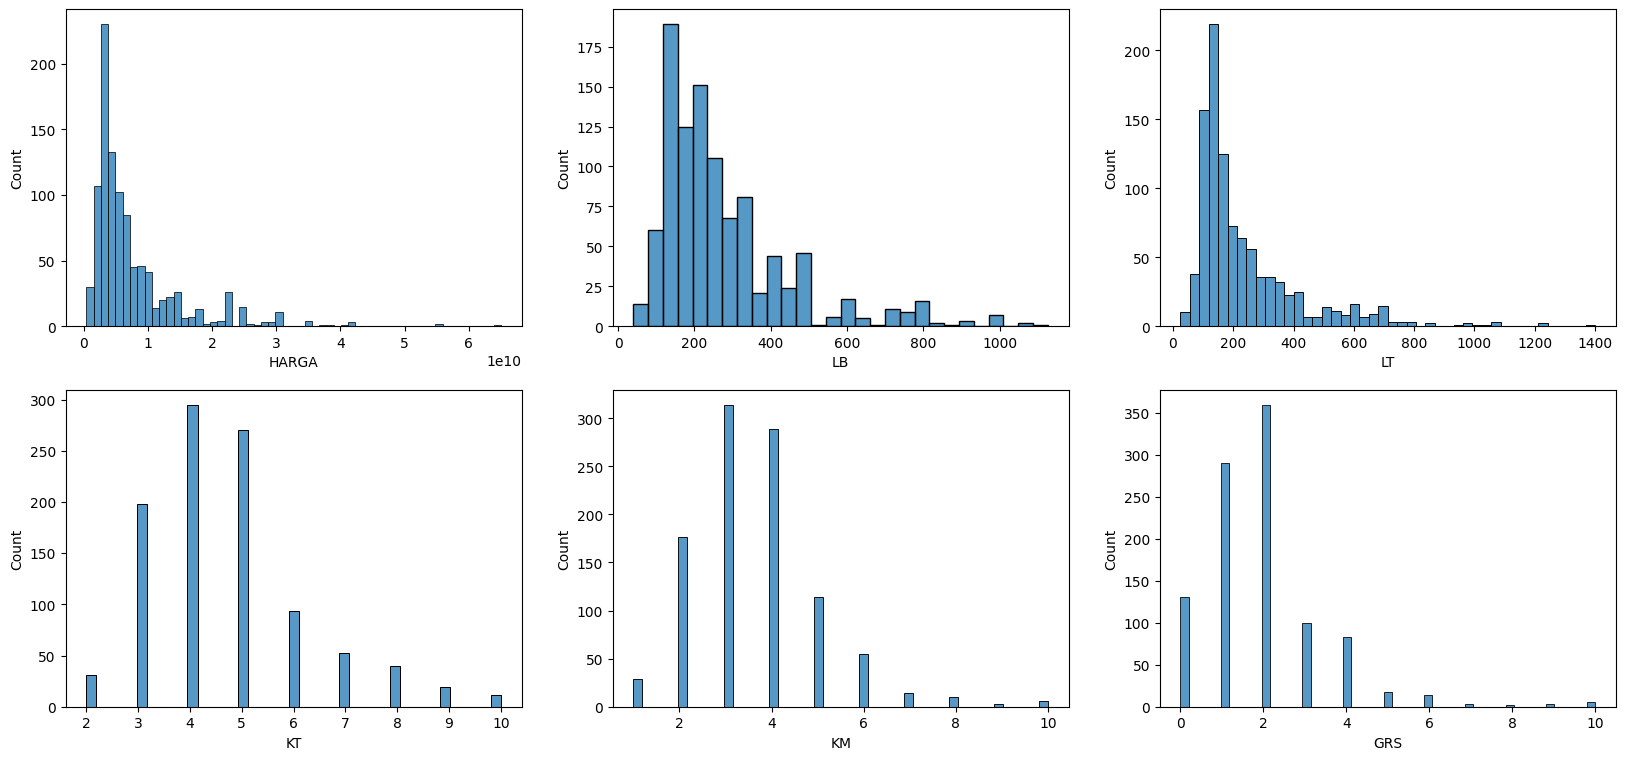

In [117]:
#Visualisasi menggunakan Histogram Multipleplot

plt.figure(figsize=(20,14))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.histplot(df[i[1]])
plt.show()

<ipython-input-118-1586035a28d8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, center=1, fmt='.2g')


<Axes: >

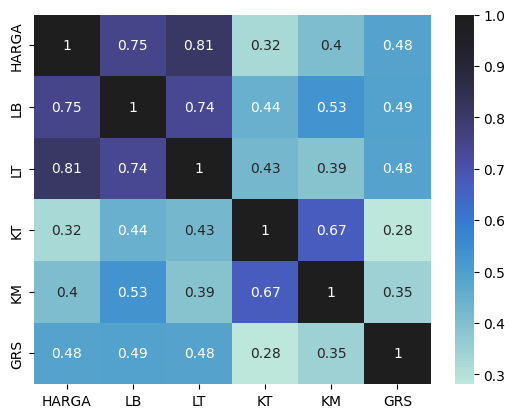

In [118]:
#Visualisasi menggunakan Heatmap untuk melihat korelasi antar variabel sekaligus

sns.heatmap(df.corr(), annot=True, center=1, fmt='.2g')

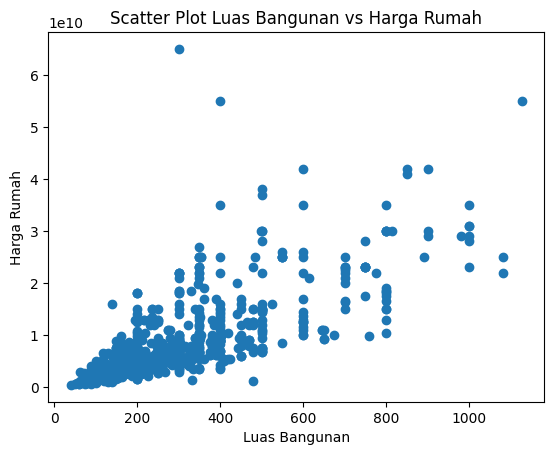

In [119]:
#Visualisasi ScatterPlot 

plt.scatter(df['LB'], df['HARGA'])
plt.xlabel('Luas Bangunan')
plt.ylabel('Harga Rumah')
plt.title('Scatter Plot Luas Bangunan vs Harga Rumah')
plt.show()

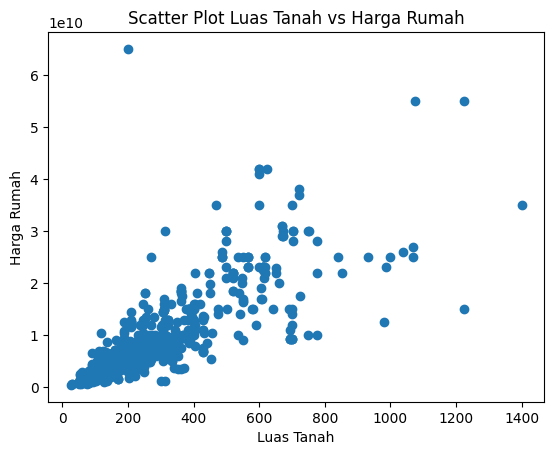

In [120]:
#Visualisasi ScatterPlot 

plt.scatter(df['LT'], df['HARGA'])
plt.xlabel('Luas Tanah')
plt.ylabel('Harga Rumah')
plt.title('Scatter Plot Luas Tanah vs Harga Rumah')
plt.show()

In [121]:
#Penentuan variabel X dan Y dari dataset
X = df[['LB', 'LT', 'KT', 'KM', 'GRS']]
y = df['HARGA']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Buat objek Linear Regression
model = LinearRegression()

# Fitting data latih
model.fit(X_train, y_train)

# Prediksi harga rumah
y_pred = model.predict(X_test)


In [122]:
# Evaluasi performa model
print('R-square:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R-square: 0.6388704433330001
Mean Squared Error: 2.6499374320313192e+19
Mean Absolute Error: 2103677036.5481746


R-Square adalah suatu ukuran statistik yang digunakan untuk mengevaluasi seberapa dekat model regresi dapat memperkirakan variabel terikat dari variabel bebas. R-Square memberikan informasi tentang persentase variasi dalam variabel terikat yang dapat dijelaskan oleh variabel bebas yang diikutsertakan dalam model regresi.

**Nilai R-Square berkisar dari 0 hingga 1**, dan semakin tinggi nilai R-Square, semakin baik pula model regresi dalam menjelaskan variasi dalam variabel terikat. Sebaliknya, semakin rendah nilai R-Square, semakin buruk pula model regresi tersebut.

In [123]:
y_pred

array([3.50026585e+09, 1.24508970e+10, 7.99299136e+09, 2.76835024e+09,
       5.72846160e+08, 4.68951101e+09, 4.18824121e+09, 3.34587937e+09,
       4.05514620e+09, 6.29031510e+09, 3.68395749e+09, 7.58142939e+09,
       2.27525607e+10, 6.00900608e+09, 1.08841779e+10, 1.41611683e+10,
       4.25367090e+09, 1.36182503e+09, 2.38621495e+10, 4.06291743e+09,
       4.41047456e+09, 3.95482162e+09, 6.81427458e+09, 4.74165218e+09,
       4.33066452e+09, 5.44492490e+09, 5.82177113e+09, 6.27391368e+09,
       4.29336628e+09, 1.12896634e+10, 3.63931355e+09, 5.03368434e+09,
       2.31169870e+10, 1.46280075e+10, 8.50556425e+09, 5.17347620e+09,
       8.57187107e+09, 3.30022520e+09, 2.16951706e+10, 2.59176021e+09,
       5.23781268e+09, 2.72501545e+09, 3.56252256e+09, 6.03507383e+09,
       2.61159262e+09, 6.12813723e+09, 2.12174804e+09, 3.68812509e+09,
       1.64067726e+10, 4.65930095e+09, 9.44738427e+09, 4.37573301e+09,
       4.40993032e+09, 1.11047606e+10, 1.08315608e+10, 2.10571526e+09,
      

In [124]:
#Uji Coba Prediksi Harga Rumah

#Data baru
data_rumah_baru = pd.DataFrame({ 
                                'LB': [190, 240, 115],
                                'LT': [215, 251, 201],
                                'KT': [1, 3, 2],
                                'KM': [1, 2, 1],
                                'GRS': [1, 3, 2],
})

data_rumah_baru

,LB,LT,KT,KM,GRS
0,190,215,1,1,1
1,240,251,3,2,3
2,115,201,2,1,2


In [125]:
prediksi_harga = model.predict(data_rumah_baru)
prediksi_harga

array([6.92960675e+09, 8.07769243e+09, 5.42421126e+09])

In [126]:
data_rumah_baru.insert(5, "Harga Rumah", prediksi_harga)

# merubah nilai pada kolom Harga Rumah menjadi nilai yang mudah dibaca
pd.options.display.float_format = '{:.2f}'.format
data_rumah_baru ["Harga Rumah"] = data_rumah_baru ["Harga Rumah"]

data_rumah_baru 

,LB,LT,KT,KM,GRS,Harga Rumah
0,190,215,1,1,1,6929606754.92
1,240,251,3,2,3,8077692426.63
2,115,201,2,1,2,5424211262.53


Nampak bahwa hasil training komputer pada data rumah berhasil, dan diuji coba pada data baru yang memberikan hasil prediksi harga rumah dari data yang diberikan 

**DONE :)**